In [ ]:
!pip install xlsxwriter
!pip install cssselect 
!pip install dask[complete]

     |████████████████████████████████| 148 kB 13.1 MB/s 
     |████████████████████████████████| 123 kB 12.2 MB/s 
     |████████████████████████████████| 786 kB 44.5 MB/s 
     |████████████████████████████████| 779 kB 41.7 MB/s 
     |████████████████████████████████| 778 kB 27.5 MB/s 
     |████████████████████████████████| 776 kB 45.0 MB/s 
     |████████████████████████████████| 769 kB 28.0 MB/s 
     |████████████████████████████████| 766 kB 42.3 MB/s 
     |████████████████████████████████| 1.0 MB 41.1 MB/s 
     |████████████████████████████████| 722 kB 41.4 MB/s 
     |████████████████████████████████| 722 kB 45.0 MB/s 
     |████████████████████████████████| 715 kB 34.3 MB/s 
     |████████████████████████████████| 705 kB 46.1 MB/s 
     |████████████████████████████████| 699 kB 44.0 MB/s 
     |████████████████████████████████| 696 kB 47.7 MB/s 
     |████████████████████████████████| 684 kB 45.4 MB/s 
     |████████████████████████████████| 679 kB 48.5 MB/s 
     |████████

In [ ]:
#mporting all the libraries
import sys
import datetime
import pandas as pd                          # package to store and manipulate data
import numpy as np                           # package to store and manipulate data
import matplotlib.pyplot as plt              # plotting package
import operator
from collections import Counter
import itertools  
import collections
import urllib.request 
import dask.dataframe as dd
from geopy.geocoders import Nominatim
import seaborn as sns                        # plotting package 
import sklearn                               # model building package
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import re                                    # packages to clean text
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
import nltk as nlp
nltk.download('wordnet')
import string
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.colors as mcolors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('drive/My Drive/fake_followers.csv') # loading dataset from google drive

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,created_at,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,timestamp
0,Sat Apr 20 13:19:19 +0000 2013,325599560959393793,https://t.co/iocNIgHxXH. @LovesOfaLDNgirl her...,"<a href=""http://twitter.com/download/iphone"" r...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,1,2013-04-20 15:19:19
1,Tue Apr 16 19:31:39 +0000 2013,324243711443730434,Well done hubby @Allan_76 http://t.co/AaeTwLucUG,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,1,2013-04-16 21:31:39
2,Tue Apr 16 17:38:06 +0000 2013,324215137055670274,Two years with my lovely husband - thank you f...,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,1,2013-04-16 19:38:06
3,Sun Apr 14 15:33:00 +0000 2013,323458877003792386,Sorry bunny about your ears but I was hungry.....,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,2013-04-14 17:33:00
4,Fri Apr 12 15:37:59 +0000 2013,322735354148945920,"Small man, big drink @Allan_76 http://t.co/4NU...","<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,NaN,NaN,0,1,1,2013-04-12 17:37:59


In [ ]:
df['sample_tweet_text'] = df['text']    

In [ ]:
# This function will extract the twitter handles of retweed people
def find_retweeted(sample_tweet_text):
     return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', sample_tweet.text)

In [ ]:
# This function will extract the twitter handles of people mentioned in the tweet
def find_mentioned(sample_tweet_text):
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', sample_tweet_text)

In [ ]:
# This function will extract hashtags
def find_hashtags(sample_tweet_text):
     return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)',  sample_tweet_text)

In [ ]:
# Takes a string and removes web links from it   
def remove_links(sample_tweet_text):
    sample_tweet_text = re.sub(r'http\S+', '', sample_tweet_text)
    sample_tweet_text = re.sub(r'bit.ly/\S+', '', sample_tweet_text)
    sample_tweet_text = sample_tweet_text.strip('[link]')
    return sample_tweet_text

In [ ]:
# Takes a string and removes retweet and @user information
def remove_users(sample_tweet_text):
    sample_tweet_text = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', sample_tweet_text)
    sample_tweet_text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', sample_tweet_text)
    return sample_tweet_text

In [ ]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

In [ ]:
df['sample_tweet_text'] = df['sample_tweet_text'].str.replace('[^\w\s]','')

In [ ]:
# cleaning tweets function
clean_tweet = []
for sample_tweet_text in df.sample_tweet_text: 
    sample_tweet_text = re.sub('[^a-zA-Z]',' ',str(sample_tweet_text))
    sample_tweet_text = sample_tweet_text.lower()               # lower case
    sample_tweet_text = remove_users(sample_tweet_text)         # remove user mentions 
    sample_tweet_text = remove_links(sample_tweet_text)         # remove links 
    sample_tweet_text = nltk.word_tokenize(sample_tweet_text)   # tokenization 
    tweet_token = [ word for word in sample_tweet_text if not word in set(stopwords.words('english'))]  # remove stopwords 
    tweet_token = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token]
    sample_tweet_text = " ".join(tweet_token)
    clean_tweet.append(sample_tweet_text)

In [ ]:
# clean tweets
clean_tweet

['lovesofaldngirl',
 'well done hubbi allan',
 'two year love husband thank cotton flower allan x vawxev',
 'sorri bunni ear hungri xyglpgisb',
 'small man big drink allan nul ud iu',
 'ast day boo pjija',
 'mezz shot lunch tkq c',
 'readi hit beach day iefeof',
 'ght opera n po',
 'ove day muscat turtl beach',
 'first class bump xxcxokg',
 'happi easter everyon gqz',
 'ove day alban island pamdodd ye old fight cock',
 'ook forward sun muscat next week bz hazj',
 'mannli edelelynch keavylynch sure sarah malcolm would would love see u girl class teach',
 'mal treat sinocarrol edelelynch keavylynch lindsayarma lovesofaldngirl big reunion weekend k c',
 'mannli mal treat lovesofaldngirl would amaz would love come work say hi',
 'ucki happi valentin everyon mkhzfe',
 'snowi walk along canal hj',
 'ovesofaldngirl ian mannli lindsayarma sinocarrol keavylynch edelelynch haha great pictur feel old good luck girl',
 'rt harpercollin retweet want write resolut',
 'great show today go see u haven

In [ ]:
!pip install vaderSentiment   # pip install vader sentiment tool

     |████████████████████████████████| 125 kB 12.6 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer   # import vader sentiment tool

In [ ]:
# creating object of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# creating new column of cleaned tweets 
df['clean_tweet'] = df['sample_tweet_text'].apply(lambda clean_tweet:clean_tweet)

In [ ]:
df.head()

,created_at,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,timestamp,sample_tweet_text,clean_tweet
0,Sat Apr 20 13:19:19 +0000 2013,325599560959393793,https://t.co/iocNIgHxXH. @LovesOfaLDNgirl her...,"<a href=""http://twitter.com/download/iphone"" r...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,1,2013-04-20 15:19:19,httpstcoiocNIgHxXH LovesOfaLDNgirl here is th...,httpstcoiocNIgHxXH LovesOfaLDNgirl here is th...
1,Tue Apr 16 19:31:39 +0000 2013,324243711443730434,Well done hubby @Allan_76 http://t.co/AaeTwLucUG,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,1,2013-04-16 21:31:39,Well done hubby Allan_76 httptcoAaeTwLucUG,Well done hubby Allan_76 httptcoAaeTwLucUG
2,Tue Apr 16 17:38:06 +0000 2013,324215137055670274,Two years with my lovely husband - thank you f...,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,1,2013-04-16 19:38:06,Two years with my lovely husband thank you fo...,Two years with my lovely husband thank you fo...
3,Sun Apr 14 15:33:00 +0000 2013,323458877003792386,Sorry bunny about your ears but I was hungry.....,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,2013-04-14 17:33:00,Sorry bunny about your ears but I was hungry h...,Sorry bunny about your ears but I was hungry h...
4,Fri Apr 12 15:37:59 +0000 2013,322735354148945920,"Small man, big drink @Allan_76 http://t.co/4NU...","<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,NaN,NaN,0,1,1,2013-04-12 17:37:59,Small man big drink Allan_76 httptco4NUl8UD9IU,Small man big drink Allan_76 httptco4NUl8UD9IU


In [ ]:
sid.polarity_scores(df.iloc[0]['clean_tweet'])    # example of first row polarity score 

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
# applying polarity scores to the cleaned tweets and making new column as scores
df['scores'] = df['clean_tweet'].apply(lambda clean_tweet:sid.polarity_scores(str(clean_tweet)))

In [ ]:
# making new column as compund scores 
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [ ]:
df['score'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

In [ ]:
df['score'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

In [ ]:
df.head()

,created_at,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,timestamp,sample_tweet_text,clean_tweet,scores,compound,score
0,Sat Apr 20 13:19:19 +0000 2013,325599560959393793,https://t.co/iocNIgHxXH. @LovesOfaLDNgirl her...,"<a href=""http://twitter.com/download/iphone"" r...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,1,2013-04-20 15:19:19,httpstcoiocNIgHxXH LovesOfaLDNgirl here is th...,httpstcoiocNIgHxXH LovesOfaLDNgirl here is th...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,Tue Apr 16 19:31:39 +0000 2013,324243711443730434,Well done hubby @Allan_76 http://t.co/AaeTwLucUG,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,1,2013-04-16 21:31:39,Well done hubby Allan_76 httptcoAaeTwLucUG,Well done hubby Allan_76 httptcoAaeTwLucUG,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.2732,pos
2,Tue Apr 16 17:38:06 +0000 2013,324215137055670274,Two years with my lovely husband - thank you f...,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,1,2013-04-16 19:38:06,Two years with my lovely husband thank you fo...,Two years with my lovely husband thank you fo...,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.7430,pos
3,Sun Apr 14 15:33:00 +0000 2013,323458877003792386,Sorry bunny about your ears but I was hungry.....,"<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0,1,0,2013-04-14 17:33:00,Sorry bunny about your ears but I was hungry h...,Sorry bunny about your ears but I was hungry h...,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.0387,neg
4,Fri Apr 12 15:37:59 +0000 2013,322735354148945920,"Small man, big drink @Allan_76 http://t.co/4NU...","<a href=""http://instagram.com"" rel=""nofollow"">...",10935572,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,NaN,NaN,0,1,1,2013-04-12 17:37:59,Small man big drink Allan_76 httptco4NUl8UD9IU,Small man big drink Allan_76 httptco4NUl8UD9IU,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [ ]:
# function for assigning tweets as positive, negative, neutral
summary = {"positive":0,"neutral":0,"negative":0}
for clean_tweet in df.clean_tweet: 
    ss = sid.polarity_scores(str(clean_tweet))
    if ss["compound"] == 0.0:         # tweets as neutral if compound score is equal to 0
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:        # tweets as positive if compound score is greater than 0
        summary["positive"] +=1
    else:
        summary["negative"] +=1        # tweets as negative if compound score is less than 0
print(summary)

{'positive': 42682, 'neutral': 129917, 'negative': 23428}


In [ ]:
# creating dataframe of above sentiment dictionary
data_items = summary.items()
data_list = list(data_items)
df_sentiment = pd.DataFrame(data_list)

In [ ]:
print(df_sentiment)

          0       1
0  positive   42682
1   neutral  129917
2  negative   23428


In [ ]:
df_sentiment.set_axis(["sentiment", "number_of_tweets"], axis =1, inplace =True)

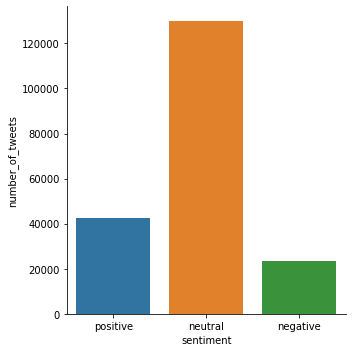

In [ ]:
sns.catplot(x="sentiment", y="number_of_tweets", kind="bar", data=df_sentiment)

In [ ]:
df['in_reply_to_user_id'].value_counts().head() 

0            168868
230321443       910
95689353        643
208611542       432
231030666       418
Name: in_reply_to_user_id, dtype: int64

In [ ]:
replies = df.in_reply_to_user_id.items()
user_replies = list(replies)
df_user_replies = pd.DataFrame(user_replies)

In [ ]:
df_m = df_user_replies.set_axis(['id_no', 'replied_to_user_id'], axis=1, inplace=False)

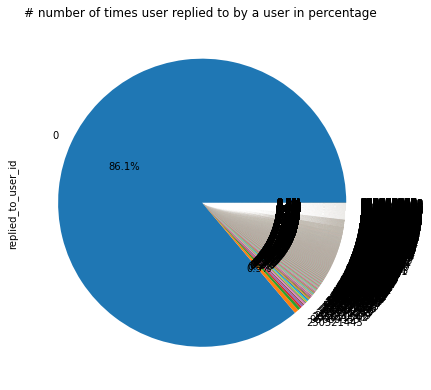

In [ ]:
plt.figure(figsize=(6,6)) 
df_m['replied_to_user_id'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.grid(False)
plt.tight_layout()
plt.title('# number of times user replied to by a user in percentage ')
plt.savefig("user replies.pdf")

In [ ]:
# changing date format 
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index(df['created_at'],inplace=True)
df.index
data_sample_from_pd = dd.from_pandas(df, npartitions=1)
data_sample_from_pd.index.head()

DatetimeIndex(['2007-12-07 13:57:21+00:00', '2008-10-15 03:36:17+00:00',
               '2008-11-26 02:50:59+00:00', '2009-02-06 14:06:29+00:00',
               '2009-02-06 15:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='created_at', freq=None)

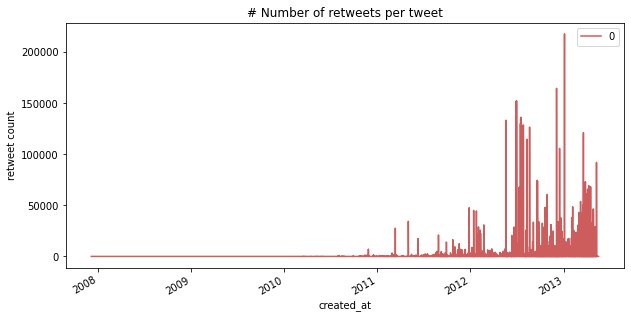

In [ ]:
# visualizing retweets per tweet
time_retweets = pd.DataFrame(data =df['retweet_count'].values, index = df['created_at'])
time_retweets.plot(figsize=(10, 5), color='indianred')
plt.ylabel('retweet count') 
plt.title('# Number of retweets per tweet')
plt.savefig("retweets.pdf")

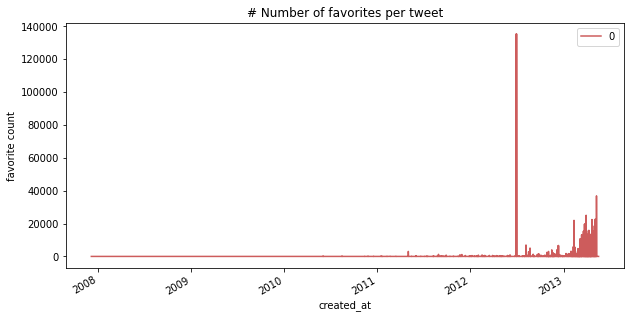

In [ ]:
# visualizing favorites per tweet
time_favorites = pd.DataFrame(data =df['favorite_count'].values, index = df['created_at'])
time_favorites.plot(figsize=(10, 5), color='indianred')
plt.ylabel('favorite count') 
plt.title('# Number of favorites per tweet')
plt.savefig("favorites.pdf")

In [ ]:
df_normal =df[["favorite_count", "retweet_count"]]  # assigning favorites and retweets to df for normalization

In [ ]:
from sklearn import preprocessing
scalar = preprocessing.MinMaxScaler()

In [ ]:
# data normalization
x_scalar = scalar.fit_transform(df_normal)
df_normal = pd.DataFrame(x_scalar)   

In [ ]:
df_normal

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
196022,0.0,0.0
196023,0.0,0.0
196024,0.0,0.0
196025,0.0,0.0


In [ ]:
df_normal.set_axis(["favorite_count", "retweet_count"], axis =1, inplace =True)

In [ ]:
corr = df_normal.corr()   # finding correlation between favorites and retweets
corr

,favorite_count,retweet_count
favorite_count,1.000000,0.365167
retweet_count,0.365167,1.000000


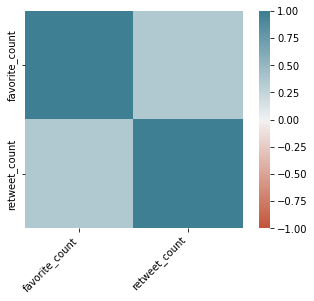

In [ ]:
# visualizing correlation matrix
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [ ]:
# loading political bots 
df1 = pd.read_csv('/political-bots-2019_tweets.csv', encoding ="unicode_escape")

In [ ]:
df1.head()

,created_at,user/follow_request_sent,user/has_extended_profile,user/profile_use_background_image,user/default_profile_image,user/id,user/profile_background_image_url_https,user/verified,user/translator_type,user/profile_text_color,user/profile_image_url_https,user/profile_sidebar_fill_color,user/entities/url/urls/0/url,user/entities/url/urls/0/indices/0,user/entities/url/urls/0/indices/1,user/entities/url/urls/0/expanded_url,user/entities/url/urls/0/display_url,user/followers_count,user/profile_sidebar_border_color,user/id_str,user/profile_background_color,user/listed_count,user/is_translation_enabled,user/utc_offset,user/statuses_count,user/description,user/friends_count,user/location,user/profile_link_color,user/profile_image_url,user/following,user/geo_enabled,user/profile_banner_url,user/profile_background_image_url,user/screen_name,user/lang,user/profile_background_tile,user/favourites_count,user/name,user/notifications,user/url,user/created_at,user/contributors_enabled,user/time_zone,user/protected,user/default_profile,user/is_translator
0,Sat Jul 08 01:17:23 +0000 2017,False,False,True,False,2312443350,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/859466387...,DDEEF6,http://t.co/jYvqmtPizF,0.0,22.0,http://MAgop.US,MAgop.US,1319,FFFFFF,2312443350,C0DEED,9,False,NaN,984,We #followback Right-Minded Patriots & Liberty...,1295,Massachusetts,0084B4,http://pbs.twimg.com/profile_images/8594663871...,False,False,https://pbs.twimg.com/profile_banners/23124433...,http://pbs.twimg.com/profile_background_images...,WBridgewtrMAGOP,en,True,950,WBridgewater MAGOP,False,http://t.co/jYvqmtPizF,Sun Jan 26 20:42:09 +0000 2014,False,NaN,False,False,False
1,Wed Apr 18 16:07:19 +0000 2018,False,False,True,False,1865011970,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/864910995...,C0DFEC,http://t.co/UvH3kIFnqg,0.0,22.0,http://www.MAGOP.us,MAGOP.us,1310,FFFFFF,1865011970,22330,12,False,NaN,695,We #followback Right-Minded Patriots & Liberty...,1264,Massachusetts,0084B4,http://pbs.twimg.com/profile_images/8649109954...,False,False,https://pbs.twimg.com/profile_banners/18650119...,http://pbs.twimg.com/profile_background_images...,MiddletonMAGOP,en,True,189,Middleton MAGOP,False,http://t.co/UvH3kIFnqg,Sat Sep 14 21:09:01 +0000 2013,False,NaN,False,False,False
2,Sat Apr 07 05:01:16 +0000 2018,False,False,True,False,701329338,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/852604219...,C0DFEC,http://t.co/dynJvZ70Il,0.0,22.0,http://www.MAGOP.US,MAGOP.US,1522,FFFFFF,701329338,22330,12,False,-10800.0,2012,We #followback Right-Minded Patriots & Liberty...,1504,"Lowell, Massachusetts",0084B4,http://pbs.twimg.com/profile_images/8526042190...,False,False,https://pbs.twimg.com/profile_banners/70132933...,http://pbs.twimg.com/profile_background_images...,LowellMAGOP,en,True,1115,Lowell MAGOP,False,http://t.co/dynJvZ70Il,Tue Jul 17 16:18:48 +0000 2012,False,Atlantic Time (Canada),False,False,False
3,Thu Jan 25 20:02:58 +0000 2018,False,False,True,False,2318983652,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/889609194...,DDEEF6,http://t.co/ap5l34TcZV,0.0,22.0,http://MAGOP.us,MAGOP.us,1251,FFFFFF,2318983652,C0DEED,10,False,NaN,655,We #followback Right-Minded Patriots & Liberty...,1190,Massachusetts,0084B4,http://pbs.twimg.com/profile_images/8896091944...,False,False,https://pbs.twimg.com/profile_banners/23189836...,http://pbs.twimg.com/profile_background_images...,AquinnahMAGOP,en,True,319,Aquinnah MAGOP,False,http://t.co/ap5l34TcZV,Thu Jan 30 14:20:07 +0000 2014,False,NaN,False,False,False
4,Fri Dec 01 00:00:46 +0000 2017,False,False,True,False,1551216937,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/883402465...,C0DFEC,http://t.co/BkObE6YBst,0.0,22.0,http://MAGOP.us,MAGOP

In [ ]:
df1['user'] = 'bot'   # since these are identified political bots therfore i am assigning target as bot

In [ ]:
df1.head()

,created_at,user/follow_request_sent,user/has_extended_profile,user/profile_use_background_image,user/default_profile_image,user/id,user/profile_background_image_url_https,user/verified,user/translator_type,user/profile_text_color,user/profile_image_url_https,user/profile_sidebar_fill_color,user/entities/url/urls/0/url,user/entities/url/urls/0/indices/0,user/entities/url/urls/0/indices/1,user/entities/url/urls/0/expanded_url,user/entities/url/urls/0/display_url,user/followers_count,user/profile_sidebar_border_color,user/id_str,user/profile_background_color,user/listed_count,user/is_translation_enabled,user/utc_offset,user/statuses_count,user/description,user/friends_count,user/location,user/profile_link_color,user/profile_image_url,user/following,user/geo_enabled,user/profile_banner_url,user/profile_background_image_url,user/screen_name,user/lang,user/profile_background_tile,user/favourites_count,user/name,user/notifications,user/url,user/created_at,user/contributors_enabled,user/time_zone,user/protected,user/default_profile,user/is_translator,user
0,Sat Jul 08 01:17:23 +0000 2017,False,False,True,False,2312443350,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/859466387...,DDEEF6,http://t.co/jYvqmtPizF,0.0,22.0,http://MAgop.US,MAgop.US,1319,FFFFFF,2312443350,C0DEED,9,False,NaN,984,We #followback Right-Minded Patriots & Liberty...,1295,Massachusetts,0084B4,http://pbs.twimg.com/profile_images/8594663871...,False,False,https://pbs.twimg.com/profile_banners/23124433...,http://pbs.twimg.com/profile_background_images...,WBridgewtrMAGOP,en,True,950,WBridgewater MAGOP,False,http://t.co/jYvqmtPizF,Sun Jan 26 20:42:09 +0000 2014,False,NaN,False,False,False,bot
1,Wed Apr 18 16:07:19 +0000 2018,False,False,True,False,1865011970,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/864910995...,C0DFEC,http://t.co/UvH3kIFnqg,0.0,22.0,http://www.MAGOP.us,MAGOP.us,1310,FFFFFF,1865011970,22330,12,False,NaN,695,We #followback Right-Minded Patriots & Liberty...,1264,Massachusetts,0084B4,http://pbs.twimg.com/profile_images/8649109954...,False,False,https://pbs.twimg.com/profile_banners/18650119...,http://pbs.twimg.com/profile_background_images...,MiddletonMAGOP,en,True,189,Middleton MAGOP,False,http://t.co/UvH3kIFnqg,Sat Sep 14 21:09:01 +0000 2013,False,NaN,False,False,False,bot
2,Sat Apr 07 05:01:16 +0000 2018,False,False,True,False,701329338,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/852604219...,C0DFEC,http://t.co/dynJvZ70Il,0.0,22.0,http://www.MAGOP.US,MAGOP.US,1522,FFFFFF,701329338,22330,12,False,-10800.0,2012,We #followback Right-Minded Patriots & Liberty...,1504,"Lowell, Massachusetts",0084B4,http://pbs.twimg.com/profile_images/8526042190...,False,False,https://pbs.twimg.com/profile_banners/70132933...,http://pbs.twimg.com/profile_background_images...,LowellMAGOP,en,True,1115,Lowell MAGOP,False,http://t.co/dynJvZ70Il,Tue Jul 17 16:18:48 +0000 2012,False,Atlantic Time (Canada),False,False,False,bot
3,Thu Jan 25 20:02:58 +0000 2018,False,False,True,False,2318983652,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/889609194...,DDEEF6,http://t.co/ap5l34TcZV,0.0,22.0,http://MAGOP.us,MAGOP.us,1251,FFFFFF,2318983652,C0DEED,10,False,NaN,655,We #followback Right-Minded Patriots & Liberty...,1190,Massachusetts,0084B4,http://pbs.twimg.com/profile_images/8896091944...,False,False,https://pbs.twimg.com/profile_banners/23189836...,http://pbs.twimg.com/profile_background_images...,AquinnahMAGOP,en,True,319,Aquinnah MAGOP,False,http://t.co/ap5l34TcZV,Thu Jan 30 14:20:07 +0000 2014,False,NaN,False,False,False,bot
4,Fri Dec 01 00:00:46 +0000 2017,False,False,True,False,1551216937,https://pbs.twimg.com/profile_background_image...,False,none,333333,https://pbs.twimg.com/profile_images/883402465...,C0DFEC,http://t.co/BkObE6YBst,0.0,22.0,

In [ ]:
# checking if followers count is greater than friends count
df1['Result'] = np.where(df1['user/followers_count'].max(axis=0)>(df1['user/friends_count']), 1, 0)

In [ ]:
df1['Result']

0     1
1     1
2     1
3     1
4     1
     ..
57    1
58    1
59    1
60    1
61    1
Name: Result, Length: 62, dtype: int64

In [ ]:
df1['Result'].value_counts()     # for all users followers count is greater than friend count

1    62
Name: Result, dtype: int64

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.gridspec import GridSpec

Text(30.375, 0.5, 'users_count')

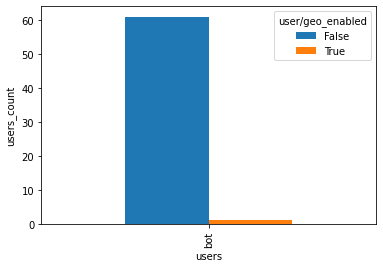

In [ ]:
# plotting number users geo enabled or not
pd.crosstab(df1['user'], df1['user/geo_enabled']).plot.bar()
plt.savefig("users_geo_enabled.pdf")
plt.xlabel("users")
plt.ylabel("users_count")

Text(0, 0.5, 'users_count')

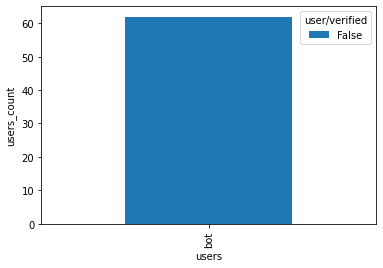

In [ ]:
# analysing number of users verified or not
pd.crosstab(df1['user'], df1['user/verified']).plot.bar()
plt.xlabel("users")
plt.ylabel("users_count")